<!-- Badges: -->

<!-- Title: -->
<div align="center">
  <h1><b> Multi-qubit gates </b></h1>
  <h2> Quantum Circuit Theory and Implementations </h2>
</div>
<br>

<div align='center'>
<table class="tfo-notebook-buttons" align="head">
  <td>
    <a target="_blank" href="https://github.com/QuCAI-Lab/quantum-circuit-theory"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table>
</div>

In [8]:
%run 10_implementations.ipynb

Author: Lucas Camponogara Viera

Github username: camponogaraviera

Website: https://qucai-lab.github.io/

Last updated: 2024-03-08

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.22.1

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 6.5.0-21-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Git repo: https://github.com/QuCAI-Lab/quantum-circuit-theory.git

Git branch: dev

scipy     : 1.9.3
pennylane : 0.28.0
pylatexenc: 2.10
watermark : 2.3.1
IPython   : 8.22.1
sympy     : 1.11.1
numpy     : 1.23.5
matplotlib: 3.6.2

Watermark: 2.3.1

{'commit_hash': 'cf4a6f5b6',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/home/lucas/anaconda3/envs/qct/lib/python3.11/site-packages/IPython',
 'ipython_version': '8.22.1',
 'os_name': 'posix',
 'platform': 'Linux-6.5.0-21-generic-x86_64-with-glibc2.35',
 'sys_executable': '/home/lucas/anaconda3/envs/qct/bin/python',
 'sys_platfor

# $C_n^{j}(U_{2^m})$ gate with $n$ control qubits and $m$ target qubits

Let $U_{2^m}$ be a $2^m$ x $2^m$ unitary matrix and $I_{2^m}$ be a $2^m$ x $2^m$ identity matrix, then a generic multicontrolled gate with $n$ control qubits and $m$ target qubits can be written as:

\begin{equation}
C_n^{j}(U_{2^m}) = \sum_{i=0, i\neq j}^{2^n-1}I_{2^m} \otimes |i\rangle\langle i|+ U_{2^m} \otimes |j\rangle\langle j|.
\end{equation}

## Particular cases

CNOT Gate:

\begin{align}
CX \equiv C_1(X_{2^1}) = \sum_{i=0, i\neq j}^{2^1-1}I_{2^1} \otimes |i\rangle\langle i|+ X_{2^1} \otimes |j\rangle\langle j| = I_2 \otimes |0\rangle\langle 0\rangle + X \otimes |1 \rangle \langle 1|.
\end{align}

In a similar fashion:

$CRY  = CU3(\theta, 0,0) \equiv C_1(RY_{2^1}) = I_2 \otimes |0\rangle\langle 0\rangle + RY(\theta) \otimes |1 \rangle \langle 1|$.

In a similar fashion:

$CCRY \equiv C_1(CRY)_{2^2} = I_2 \otimes I_2 \otimes |0\rangle\langle 0\rangle + CRY \otimes |1 \rangle \langle 1|$.

$CCCX \equiv C_1(CCX)_{2^3} = I_2 \otimes I_2 \otimes I_2 \otimes |0\rangle\langle 0\rangle + CCX \otimes |1 \rangle \langle 1|$.

$CCCRY \equiv C_1(CCRY)_{2^3} = I_2 \otimes I_2 \otimes I_2 \otimes |0\rangle\langle 0\rangle + CCRY \otimes |1 \rangle \langle 1|$.

# Toffoli gate

$$CCX \equiv C_1(CX)_{2^2} = \sum_{i=0, i\neq j}^{2^1-1}I_{2^2} \otimes |i\rangle\langle i|+ (CX)_{2^2} \otimes |j\rangle\langle j| = I_2 \otimes I_2 \otimes |0\rangle\langle 0\rangle + CX \otimes |1 \rangle \langle 1|.$$

The action of the Toffoli gate is to negate the target bit if the first two control bits are 1. 

The Toffoli gate is not a native gate of NISQ quantum hardware, and it has to be decomposed into elementary single-qubit and two-qubit native gates.

Decomposition in terms of the Clifford+T finite gate set {H, S, CNOT, T} (see Nielsen and Chuang Fig. 4.9):

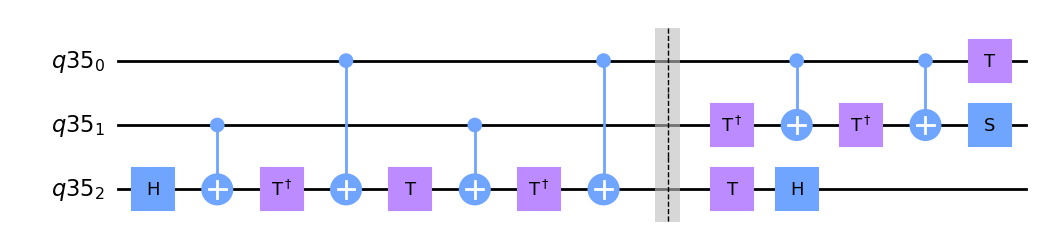

In [39]:
qr = QuantumRegister(3)                
qc = QuantumCircuit(qr)
qc.h(2)      
qc.cnot(1,2)   
qc.tdg(2)   
qc.cnot(0,2)
qc.t(2)   
qc.cnot(1,2)
qc.tdg(2)   
qc.cnot(0,2)   
qc.barrier()
qc.tdg(1)   
qc.t(2)   
qc.cnot(0,1)   
qc.h(2)
qc.tdg(1)
qc.cnot(0,1)  
qc.t(0)  
qc.s(1)  

qc.draw(output='mpl')